# Project 4: [Insert Project Title]
## Introduction, Data Cleaning, and Exploratory Data Analysis

## Table of Contents:
- [Problem Statement](#problem_statement)
- [Data Cleaning](#data_cleaning)
- [Data Dictionary](#data_dictionary)
- [Exploratory Data Analysis](#eda)

## Problem Statement<a id='problem_statement'></a>
---

### Background Research

### Data Used

* [`pppub22.csv`](../data/pppub22.csv): Insert data description here

## Data Cleaning<a id='data_cleaning'></a>
---

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
#Inspect data
df=pd.read_csv('../data/pppub22.csv')
df.head()

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,PXRRP,PXMARITL,PXRACE1,PEHSPNON,PXHSPNON,PEAFEVER,PXAFEVER,PEAFWHN1,PXAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXSPOUSE,PENATVTY,PXNATVTY,PEMNTVTY,PXMNTVTY,PEFNTVTY,PXFNTVTY,PEINUSYR,PXINUSYR,PEPAR1,PXPAR1,PEPAR2,PXPAR2,PEPAR1TYP,PXPAR1TYP,PEPAR2TYP,PXPAR2TYP,PRDASIAN,PRDTHSP,PRDTRACE,PRPERTYP,PRCITFLG,PRCITSHP,PECOHAB,PXCOHAB,PEABSRSN,PEHRUSLT,PEMLR,PRDISC,PRPTREA,PRUNTYPE,PRWKSTAT,PEIO1COW,PRCOW1,PRERELG,PRWERNAL,PRHERNAL,PRNLFSCH,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,PRDISFLG,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,A_AGE,A_SEX,A_DTIND,A_HRSPAY,A_PAYABS,A_WANTJB,A_HRLYWK,A_ENRLW,A_EXPLF,A_MJIND,A_UNMEM,A_MJOCC,A_DTOCC,A_UNCOV,A_HSCOL,A_FTPT,A_WKSCH,A_FNLWGT,A_ERNLWT,A_FAMREL,A_FAMNUM,AXAGE,AXSEX,AXLFSR,AXHRS,AXWHYABS,AXPAYABS,AXCLSWKR,AXNLFLJ,AXUSLHRS,AXUNMEM,AXUNCOV,AXENRLW,AXHSCOL,AXFTPT,AXHGA,AXHRLYWK,A_USLHRS,A_FAMTYP,A_GRSWK,A_WKSLK,A_SPOUSE,A_MARITL,A_HGA,A_HRS1,P_STAT,A_USLFT,A_CIVLF,A_FTLF,A_UNTYPE,A_CLSWKR,A_EXPRRP,A_WKSTAT,A_LFSR,A_WHYABS,A_PFREL,A_WHENLJ,A_NLFLJ,MARSUPWT,ACTC_CRD,AGE1,AGI,ANN_VAL,ANN_YN,CAID,CAP_VAL,CAP_YN,CHAMPVA,CHCARE_YN,CHELSEW_YN,CHSP_VAL,CHSP_YN,CLWK,COV,COV_CYR,COV_MULT_CYR,CSP_VAL,CSP_YN,CTC_CRD,DBTN_VAL,DEPDIR,DEPGRP,DEPMIL,DEPMRK,DEPMRKS,DEPMRKUN,DEPNONM,DEPPRIV,DIR,DIRFTYP,DIRFTYP2,DIRLIN1,DIROUT,DIS_CS,DIS_HP,DIS_SC1,DIS_SC2,DIS_VAL1,DIS_VAL2,DIS_YN,DIV_VAL,DIV_YN,DSAB_VAL,DST_SC1,DST_SC2,DST_SC1_YNG,DST_SC2_YNG,DST_VAL1,DST_VAL2,DST_VAL1_YNG,DST_VAL2_YNG,DST_YN,DST_YN_YNG,EARNER,ED_VAL,ED_YN,EIP_CRD,EIT_CRED,ERN_OTR,ERN_SRCE,ERN_VAL,ERN_YN,ESICOULD,ESIELIG1,ESIELIG2,ESIELIG3,ESIELIG4,ESIELIG5,ESIELIG6,ESIOFFER,ESITAKE1,ESITAKE2,ESITAKE3,ESITAKE4,ESITAKE5,ESITAKE6,ESITAKE7,ESITAKE8,FAMREL,FEDTAX_AC,FEDTAX_BC,FICA,FIN_VAL,FIN_YN,FRMOTR,FRM_VAL,FRSE_VAL,FRSE_YN,GRP,GRPFTYP,GRPFTYP2,GRPLIN1,GRPOUT,HEA,HHDFMX,HHDREL,HIPAID,HRCHECK,HRSWK,IHSFLG,INDUSTRY,INT_VAL,INT_YN,I_ANNVAL,I_ANNYN,I_CAID,I_CAPVAL,I_CAPYN,I_CHAMPVA,I_CHCAREYN,I_CHELSEWYN,I_CHSPVAL,I_CHSPYN,I_CSPVAL,I_CSPYN,I_DEPDIR,I_DEPGRP,I_DEPMIL,I_DEPMRK,I_DEPMRKS,I_DEPMRKUN,I_DEPNONM,I_DEPPRIV,I_DIR,I_DIROUT,I_DISCS,I_DISHP,I_DISSC1,I_DISSC2,I_DISYN,I_DIVVAL,I_DIVYN,I_DSTSC,I_DSTSCCOMP,I_DSTVAL1COMP,I_DSTVAL2COMP,I_DSTYNCOMP,I_EDTYP,I_EDYN,I_ERNSRC,I_ERNVAL,I_ERNYN,I_ESICOULD,I_ESIELIG1,I_ESIELIG2,I_ESIELIG3,I_ESIELIG4,I_ESIELIG5,I_ESIELIG6,I_ESIOFFER,I_ESITAKE1,I_ESITAKE2,I_ESITAKE3,I_ESITAKE4,I_ESITAKE5,I_ESITAKE6,I_ESITAKE7,I_ESITAKE8,I_FINVAL,I_FINYN,I_FRMVAL,I_FRMYN,I_GRP,I_GRPOUT,I_HEA,I_HIPAID,I_HRCHK,I_HRSWK,I_IHSFLG,I_INDUS,I_INTVAL,I_INTYN,I_LJCW,I_LKSTR,I_LKWEEK,I_LOSEWK,I_MCAID,I_MCARE,I_MCPREM,I_MIG1,I_MIG2,I_MIG3,I_MIL,I_MILOUT,I_MOOP,I_MOOP2,I_MRK,I_MRKOUT,I_MRKS,I_MRKSOUT,I_MRKUN,I_MRKUNOUT,I_NOEMP,I_NONM,I_NONMOUT,I_NOW_CAID,I_NOW_CHAMPVA,I_NOW_DEPDIR,I_NOW_DEPGRP,I_NOW_DEPMIL,I_NOW_DEPMRK,I_NOW_DEPMRKS,I_NOW_DEPMRKUN,I_NOW_DEPNONM,I_NOW_DEPPRIV,I_NOW_DIR,I_NOW_DIROUT,I_NOW_GRP,I_NOW_GRPOUT,I_NOW_HIPAID,I_NOW_IHSFLG,I_NOW_MCAID,I_NOW_MCARE,I_NOW_MIL,I_NOW_MILOUT,I_NOW_MRK,I_NOW_MRKOUT,I_NOW_MRKS,I_NOW_MRKSOUT,I_NOW_MRKUN,I_NOW_MRKUNOUT,I_NOW_NONM,I_NOW_NONMOUT,I_NOW_OTHMT,I_NOW_OUTDIR,I_NOW_OUTGRP,I_NOW_OUTMIL,I_NOW_OUTMRK,I_NOW_OUTMRKS,I_NOW_OUTMRKUN,I_NOW_OUTNONM,I_NOW_OUTPRIV,I_NOW_OWNDIR,I_NOW_OWNGRP,I_NOW_OWNMIL,I_NOW_OWNMRK,I_NOW_OWNMRKS,I_NOW_OWNMRKUN,I_NOW_OWNNONM,I_NOW_OWNPRIV,I_NOW_PCHIP,I_NOW_PRIV,I_NOW_PUB,I_NOW_VACARE,I_NWLKWK,I_NWLOOK,I_NXTRES,I_OCCUP,I_OEDVAL,I_OIVAL,I_OTHMT,I_OUTDIR,I_OUTGRP,I_OUTMIL,I_OUTMRK,I_OUTMRKS,I_OUTMRKUN,I_OUTNONM,I_OUTPRIV,I_OWNDIR,I_OWNGRP,I_OWNMIL,I_OWNMRK,I_OWNMRKS,I_OWNMRKUN,I_OWNNONM,I_OWNPRIV,I_PAWMO,I_PAWTYP,I_PAWVAL,I_PAWYN,I_PCHIP,I_PECOULD,I_PENINC,I_PENPLA,I_PENSC1,I_PENSC2,I_PENVAL1,I_PENVAL2,I_PENYN,I_PEOFFER,I_PEWNELIG1,I_PEWNELIG2,I_PEWNELIG3,I_PEWNELIG4,I_PEWNELIG5,I_PEWNELIG6,I_PEWNTAKE1,I_PEWNTAKE2,I_PEWNTAKE3,I_PEWNTAKE4,I_PEWNTAKE5,I_PEWNTAKE6,I_PEWNTAKE7,I_PEWNTAKE8,I_PHIPVAL,I_PHIPVAL2,I_PHMEMP,I_PMEDVAL

In [5]:
#Check shape
df.shape

(152732, 832)

In [6]:
#choose features to use in EDA and modeling
columns=['A_AGE','MIG_ST','A_FAMREL','PMED_VAL','POTC_VAL','A_MJOCC','A_HGA','A_MARITL',
         'A_SEX','HHDREL','PEAFEVER','PECERT3','PEDISDRS','PEDISEAR','PEDISEYE','PEDISOUT',
         'PEDISPHY','PEDISREM','PEHSPNON','PEINUSYR','PRCITSHP','PRDISFLG','PRDTRACE',
         'A_MJIND','PEMLR','PRWKSTAT','LJCW','WEIND','RSNNOTW','WEWKRS','WKSWORK',
         'ERN_SRCE','ERN_VAL','ERN_OTR','WSAL_VAL','DIS_HP','DIS_SC1','DIS_SC2','DSAB_VAL',
         'FIN_YN','OI_OFF','PAW_MON','PAW_TYP','WICYN','CHSP_VAL','AGI','FILESTAT','COV',
         'PUB_CYR','PRIV_CYR','SPM_POOR', 'PERLIS']

df=df[columns]

In [7]:
#rename columns to be more descriptive
df = df.rename(columns=
               {'A_AGE': 'AGE', 'MIG_ST': 'STATE','A_FAMREL':'FAM_RELATIONSHIP',
                'PMED_VAL':'OUT_POCKET_NONPREM','POTC_VAL':'OUT_POCKET_OC','A_MJOCC':'OCCUPATION',
                'A_HGA':'EDU_LVL','A_MARITL':'MARITAL','A_SEX':'SEX','HHDREL':'HOUSEHOLD_SUMMARY',
                'PEAFEVER':'MILITARY','PECERT3':'CERT_REQ','PEDISDRS':'TROUB_BATHE','PEDISEAR':'TROUB_HEAR',
                'PEDISEYE':'TROUB_SEE','PEDISOUT':'TROUB_ALONE','PEDISPHY':'TROUB_WALK','PEDISREM':'TROUB_CONC',
                'PEHSPNON':'HISPANIC','PEINUSYR':'IMMIGR_YR','PRCITSHP':'CITIZENSHIP','PRDISFLG':'DISABLED',
                'PRDTRACE':'RACE','A_MJIND':'WORK_INDUSTRY','PEMLR':'LABOR_STATUS','PRWKSTAT':'WRK_STATUS',
                'LJCW':'WRK_CLASS_LONGEST','WEIND':'LONGEST_IND','RSNNOTW':'NO_WRK_RSN','WEWKRS':'FT_PT',
                'WKSWORK':'WEEKS_WRK','ERN_SRCE':'EARN_SOURCE','ERN_VSL':'GROSS_PAY','ERN_OTR':'ERN_OTR',
                'WSAL_VAL':'EARN_TOTAL','DIS_HP':'WORK_DIS','DIS_SC1':'DIS_INC','DIS_SC2':'OTH_DIS_INC',
                'DSAB_VAL':'TOTAL_DIS_INC','FIN_YN':'FIN_ASSIST','OI_OFF':'OTH_INC','PAW_MON':'TIME_ASSIST',
                'PAW_TYP':'CASH_ASSIST','WICYN':'WIC','CHSP_VAL':'CHLD_SUP','AGI':'ADJ_GROSS_INC',
                'FILESTAT':'TAX_FILE_STAT','COV':'HEALTH_INS','PUB_CYR':'PUB_INS','PRIV_CYR':'PRIV_INS',
                'SPM_POOR': 'POV_STS', 'PERLIS' : 'POV_LVL'})

In [8]:
#decode nominal categorical variables for future use in modeling
df=df.replace({'STATE' : {0 : 'nonmover', 1 : 'Alabama', 2 : 'Alaska', 4 :' Arizona', 5 : 'Arkansas',
                          6 : 'California', 8 : 'Colorado', 9 : 'Connecticut', 10 : 'Delaware',
                          11 : 'District of Columbia', 12 : 'Florida', 13 : 'Georgia', 15 : 'Hawaii',
                          16 : 'Idaho', 17 : 'Illinois', 18 : 'Indiana', 19 : 'Iowa', 20 : 'Kansas',
                          21 : 'Kentucky', 22 : 'Louisiana', 23 : 'Maine', 24 : 'Maryland',
                          25 : 'Massachusetts', 26 : 'Michigan', 27 : 'Minnesota', 28 : 'Mississippi',
                          29 : 'Missouri', 30 : 'Montana', 31 : 'Nebraska', 32 : 'Nevada', 33 : 'New Hampshire',
                          34 : 'New Jersey', 35 : 'New Mexico', 36 : 'New York', 37 : 'North Carolina',
                          38 : 'North Dakota', 39 : 'Ohio', 40 : 'Oklahoma', 41 : 'Oregon', 42 : 'Pennsylvania',
                          44 : 'Rhode Island', 45 : 'South Carolina', 46 : 'South Dakota', 47 : 'Tennessee',
                          48 : 'Texas', 49 : 'Utah', 50 : 'Vermont', 51 : 'Virginia', 53 : 'Washington',
                          54 : 'West Virginia', 55 : 'Wisconsin', 56 : 'Wyoming', 96 : 'Abroad'}})

df=df.replace({'FAM_RELATIONSHIP' : { 0 : 'not fam', 1 : 'ref person',2:'spouse',3:'child',4:'other relatives'}})

df=df.replace({'OCCUPATION' : { 0 : 'none', 1 : 'Business/Finance',2:'Professional',3:'Service',4:'sales',
                               5:'office',6:'farming',7:'construction',8:'maintenance',9:'production',
                               10:'transportation',11:'military'}})

df=df.replace({'EDU_LVL' : {0 : 'children', 31 : 'preschool', 32 : 'elementary school', 33 : 'elementary school',
                            34 : 'middle school', 35 : 'high school no diploma', 36 : 'high school no diploma',
                            37 : 'high school no diploma', 38 : 'high school no diploma', 39 : 'high school graduate',
                            40 : 'college no degree', 41 : 'associate degree', 42 : 'associate degree',
                            43 : "bachelor's degree", 44 : "master's degree" , 45 : 'professional school degree',
                            46 : 'doctorate degree'}})

df=df.replace({'MARITAL' : { 1 : 'married/civilian spouse', 2 : 'married/military spouse',3:'married/estranged',
                            4:'widowed',5:'divorced',6:'seperated',7:'single'}})

df=df.replace({'SEX' : { 1 : 'male', 2 : 'female'}})

df=df.replace({'HOUSEHOLD_SUMMARY' : { 1 : 'householder', 2 : 'spouse of HH',3:'child/never married',
                                      4:'under 18/ever married',5:'over 18',6:'relative',7:'non-relative',
                                      8:'group living'}})

df=df.replace({'MILITARY' : { -1 : 'ineligible', 1 : 'yes',2:'no'}})

df=df.replace({'CERT_REQ' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_BATHE' : { -1 : 'not included', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_HEAR' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_SEE' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_ALONE' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_WALK' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_CONC' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'HISPANIC' : { 1 : 'yes',2:'no'}})

df=df.replace({'IMMIGR_YR' : {0 : 'not immigrant', 1 : 'before 1950', 2 : '1950s', 3 : '1960s', 4 : '1960s',
                              5 : '1970s', 6 : '1970s', 7 : '1980s', 8 : '1980s', 9 : '1980s', 10 : '1980s',
                              11 : '1980s', 12 : '1990s', 13 : '1990s', 14 : '1990s', 15 : '1990s', 16 : '1990s',
                              17 : '2000s', 18 : '2000s', 19 : '2000s', 20 : '2000s', 21 : '2000s', 22 : '2010s',
                              23 : '2010s', 24 : '2010s', 25 : '2010s', 26 : '2010s', 27 : '2020s'}})

df=df.replace({'CITIZENSHIP' : { 1 : 'native', 2:'native',3:'native',4:'non native citizen',5:'non citizen'}})

df=df.replace({'DISABLED' : { -1 : 'not included', 1 : 'yes',2:'no'}})

df=df.replace({'RACE' : {1 : 'White only', 2 : 'Black only', 3 : 'American Indian or Alaskan Native only',
                      4 : 'Asian only', 5 : 'Hawaiian/Pacific Islander only', 6 : 'White-Black', 7 : 'White-AI',
                      8 : 'White-Asian', 9 : 'White-HP', 10 : 'Black-AI', 11 :' Black-Asian', 12 : 'Black-HP',
                      13 : 'AI-Asian', 14 : 'AI-HP', 15 : 'Asian-HP', 16 : 'White-Black-AI' ,17 : 'White-Black-Asian',
                      18 : 'White-Black-HP', 19 : 'White-AI-Asian' , 20 :' White-AI-HP', 21 : 'White-Asian-HP',
                      22 : 'Black-AI-Asian', 23 : 'White-Black-AI-Asian', 24 : 'White-AI-Asian-HP',
                      25 : 'Other 3 race comb.', 26 : 'Other 4 or 5 race comb'}})

df=df.replace({'WORK_INDUSTRY' : {0 : 'Not working', 1 :' Agriculture, forestry, fishing, and hunting',
            2 : 'Mining, quarrying, and oil and gas extraction', 3 : 'Construction', 4 : 'Manufacturing',
            5 : 'Wholesale and retail trade', 6 : 'Transportation, warehousing and utilities', 7 : 'Information',
            8 : 'Finance and insurance, and real estate and rental and leasing',
            9 :' Professional, scientific, management and administrative, and waste management services',
            10 : 'Educational services, and health care and social assistance',
            11 : 'Arts, entertainment, recreation and accomodation, and food services',
            12 : 'Other services, except public administration', 13 : 'Public administration', 14 : 'Military'}})

df=df.replace({'LABOR_STATUS' : { 0 : 'not included', 1 : 'employed/at work',2:'employed/absent',3:'unemployed',
                                 4:'unemployed/looking',5:'retired',6:'disabled',7:'other'}})

df=df.replace({'WRK_STATUS' : {0 : 'Child', 1 : 'Not in labor force', 2 : 'FT hours',
                            3 : 'PT for economic reasons, usually FT', 4 :' PT for non-economic reasons, usually FT',
                            5 : 'Not at work, usually FT', 6 : 'PT hrs, usually PT for economic reasons',
                            7 : 'PT hrs, usually PT for non-economic', 8 : 'FT hours, usually PT for economic reasons',
                            9 : 'FT hours, usually PT for non-economic reasons', 10 : 'Not at work, usually part-time',
                            11 : 'Unemployed FT', 12 : 'Unemployed PT'}})

df=df.replace({'WRK_CLASS_LONGEST' : { 0 : 'no weeks', 1 : 'private',2:'federal',3:'state',4:'local',
                                      5:'self employed inc',6:'self employed not inc',7:'no pay'}})

df=df.replace({'LONGEST_IND' : {1 : 'Agriculture, forestry, fishing, and hunting',
                                2 : 'Mining, Quarrying, and Oil and Gas Extraction', 3 : 'Construction',
                                4 : 'Durable goods manufacturing', 5 : 'Nondurable goods manufacturing',
                                6 : 'Wholesale trade', 7 : 'Retail trade', 8 : 'Transportation and warehousing',
                                9 : 'Utilities', 10 : 'Information', 11 : 'Finance and insurance',
                                12 : 'Real estate and rental and leasing',
                                13 : 'Professional, scientific, & technical services',
                                14 : 'Management of companies and enterprises, administrative and support, and waste management services',
                                15 : 'Educational services', 16 : 'Health care and social assistance',
                                17 : 'Arts, entertainment, and recreation', 18 : 'Accommodations and food service',
                                19 : 'Private households', 20 : 'Other services, except private households and public administration',
                                21 : 'Public administration', 22 : 'Military', 23 : 'Never Worked'}})

df=df.replace({'NO_WRK_RSN' : {0 : 'under 15', 1 : 'ill or disabled', 2 : 'retired', 3 : 'taking care of home',
                               4 : 'going to school', 5 : 'could not find work', 6 : 'other'}})

df=df.replace({'FT_PT' : { 0 : 'under 15', 1 : 'ft all year',2:'pt all year',3:'ft part year',4:'pt part year',
                          5:'nonworker'}})

df=df.replace({'EARN_SOURCE' : { 0 : 'unemployed', 1 : 'wage',2:'self employment',3:'farm/self employment',4:'no pay'}})

df=df.replace({'ERN_OTR' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'WORK_DIS' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'DIS_INC' : {0 : 'did not receive', 1 : "worker's compensation", 2 : 'company or union disability',
                         3 : 'federal government disability', 4 : 'US military retirement disability',
                         5 : "state or local gov't employee disability", 6 : 'US railroad retirement disability',
                         7 : 'accident or disability insurance', 8 : 'blacklung miners disability',
                         9 : 'state temporary sickness', 10 :" other or don't know"}})

df=df.replace({'OTH_DIS_INC' : {0 : 'did not receive', 1 : "worker's compensation", 2 : 'company or union disability',
                         3 : 'federal government disability', 4 : 'US military retirement disability',
                         5 : "state or local gov't employee disability", 6 : 'US railroad retirement disability',
                         7 : 'accident or disability insurance', 8 : 'blacklung miners disability',
                         9 : 'state temporary sickness', 10 :" other or don't know"}})

df=df.replace({'FIN_ASSIST' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'OTH_INC' : {0 : 'no other source', 1 : 'social security', 2 : 'private pensions', 3 : 'afdc',
                         4 : 'other public assistance', 5 : 'interest', 6 : 'dividends', 7 : 'rents or royalties',
                         8 : 'estates or trusts', 9 : "state disability payments (worker's comp)",
                         10 : 'disability payments (own insurance)', 11 : 'unemployment compensation',
                         12 : 'strike benefits', 13 : 'annuities or paid up insurance policies', 14 : 'not income',
                         15 : 'longest job', 16 : 'wages or salary', 17 : 'nonfarm self-employment',
                         18 : 'farm self-employment', 19 : 'anything else', 20 : 'alimony'}})

df=df.replace({'CASH_ASSIST' : { 0 : 'under 15', 1 : 'TANF/AFDC',2:'other',3:'both'}})

df=df.replace({'WIC' : { 0 : 'not eligible', 1 : 'yes',2:'no'}})

df=df.replace({'TAX_FILE_STAT' : { 1 : 'joint under 65 y/o', 2:'joint 1p over 65 y/o', 3:'joint both ov 65 y/o',
                                  4:'head of HH',5:'single',6:'nonfiler'}})

df=df.replace({'HEALTH_INS' : { 0 : 'infant', 1 : 'yes',2:'no'}}) 

df=df.replace({'PUB_INS' : { 0 : 'infant', 1 : 'no coverage',2:'some coverage',3:'covered all year'}})

df=df.replace({'PRIV_INS' : { 0 : 'infant', 1 : 'no coverage',2:'some coverage',3:'covered all year'}})

df=df.replace({'POV_LVL' : { -1 : 'not in poverty', 1 : 'below poverty level', 2:'100-124 percent of poverty level', 
                            3:'125-149 percent of poverty level', 4:'150+ percent of poverty level'}})

In [9]:
df.isnull().sum()

AGE                   0
STATE                 0
FAM_RELATIONSHIP      0
OUT_POCKET_NONPREM    0
OUT_POCKET_OC         0
OCCUPATION            0
EDU_LVL               0
MARITAL               0
SEX                   0
HOUSEHOLD_SUMMARY     0
MILITARY              0
CERT_REQ              0
TROUB_BATHE           0
TROUB_HEAR            0
TROUB_SEE             0
TROUB_ALONE           0
TROUB_WALK            0
TROUB_CONC            0
HISPANIC              0
IMMIGR_YR             0
CITIZENSHIP           0
DISABLED              0
RACE                  0
WORK_INDUSTRY         0
LABOR_STATUS          0
WRK_STATUS            0
WRK_CLASS_LONGEST     0
LONGEST_IND           0
NO_WRK_RSN            0
FT_PT                 0
WEEKS_WRK             0
EARN_SOURCE           0
ERN_VAL               0
ERN_OTR               0
EARN_TOTAL            0
WORK_DIS              0
DIS_INC               0
OTH_DIS_INC           0
TOTAL_DIS_INC         0
FIN_ASSIST            0
OTH_INC               0
TIME_ASSIST     

In [10]:
df.to_csv('../data/clean_data/cleaned_data.csv', index = False)

## Data Dictionary<a id='data_dictionary'></a>
---

| **Feature** | **Type** | **Dataset** | **Description** |
|:-----------:|:--------:|:-----------:|:---------------:|

## Exploratory Data Analysis<a id='eda'></a>
---

In [11]:
#import data
df = pd.read_csv("../data/clean_data/cleaned_data.csv")

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,152732.0,38.277971,23.223057,0.0,17.0,38.0,57.00,85.0
OUT_POCKET_NONPREM,152732.0,683.245233,2207.327233,0.0,0.0,100.0,500.00,240000.0
OUT_POCKET_OC,152732.0,162.111745,357.770720,0.0,0.0,60.0,200.00,15000.0
WEEKS_WRK,152732.0,23.255303,24.871150,0.0,0.0,0.0,52.00,52.0
ERN_VAL,152732.0,29796.317668,63143.735339,-9999.0,0.0,0.0,42000.00,1099999.0
EARN_TOTAL,152732.0,29182.693182,63162.596252,0.0,0.0,0.0,42000.00,1550000.0
TOTAL_DIS_INC,152732.0,95.206597,1704.770965,0.0,0.0,0.0,0.00,100000.0
TIME_ASSIST,152732.0,0.050952,0.759268,0.0,0.0,0.0,0.00,12.0
CHLD_SUP,152732.0,54.544378,947.895952,0.0,0.0,0.0,0.00,99000.0
ADJ_GROSS_INC,152732.0,37421.908899,88896.730255,-141217.0,0.0,0.0,43497.75,3240777.0


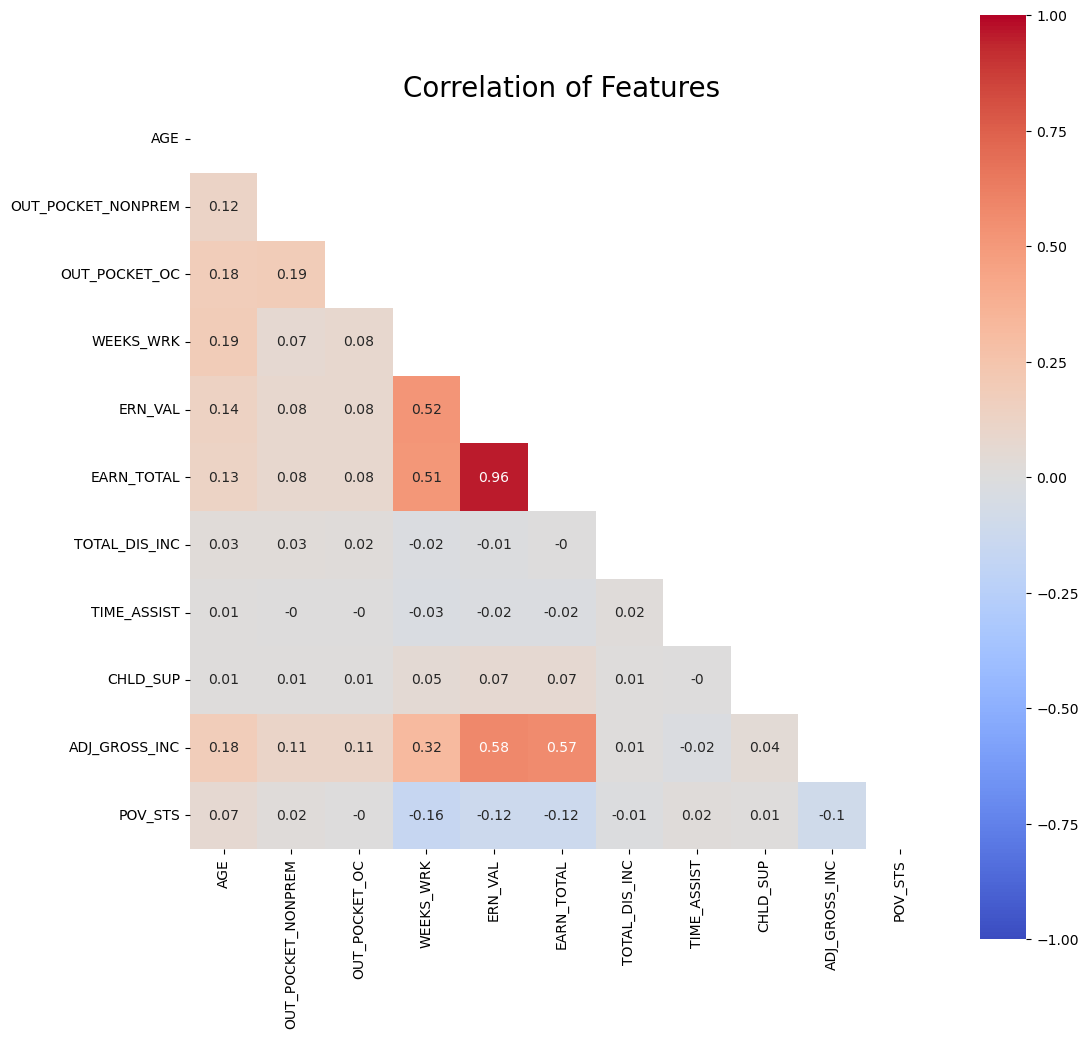

In [13]:
#Plot heatmap presenting correlation of numeric variables

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 12))
plt.title('Correlation of Features', size=20)
corr = round(df[numeric_columns].corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, cmap = 'coolwarm',mask = mask, square = True,vmin=-1,vmax=1)
plt.savefig("../images/correlation_poverty");